In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Hello, Sine

In [23]:
fs = 8000
dur = 1
freq = 440

x0 = np.sin(2*np.pi*freq*np.arange(dur*fs)/fs)


ipd.Audio(x0, rate=fs)


# Aliasing


What is the minimum frequency to avoid the aliasing in the harmonic series of the sine tones?

In [29]:
fs = 8000
dur = 0.2
freq = 200 
harmonics = [1,2,3,4,5,6,7,8,9,10]

x0 = []
for i in range(len(harmonics)):
    temp = np.sin(2*np.pi*freq*harmonics[i]*np.arange(dur*fs)/fs)
    temp = np.append(temp,np.zeros(int(dur*fs)))
    x0 = np.append(x0,temp)

ipd.Audio(x0, rate=fs)


# Generate a sinusoid sweep

We want to generate a sine waveform with a frequency sweep from 200 to 4000 Hz. Is this correct?

In [31]:
fs = 8000
dur = 2
freq = np.linspace(220,4000,dur*fs);

x1 = np.sin(2*np.pi*freq*np.arange(dur*fs)/fs);


ipd.Audio(x1, rate=fs)


Why the frequency come back? Let's plot the spectrogram. Why do we have the problem? Aliasing or other reasons?

Text(0.5, 1.0, 'Linear-frequency spectrogram')

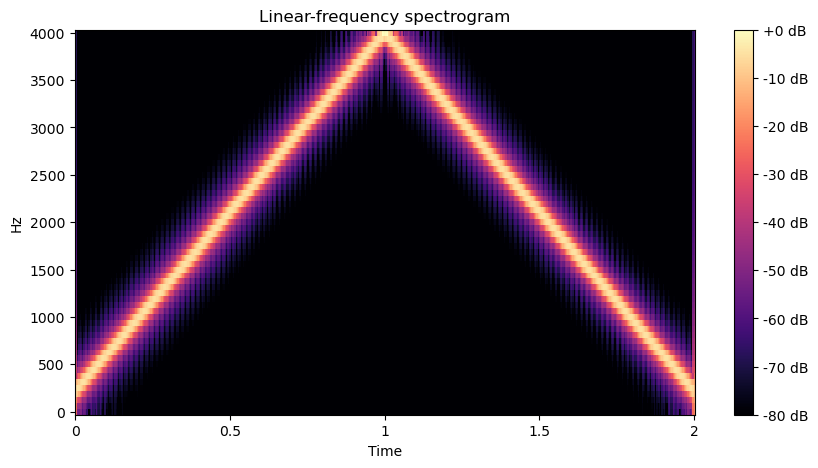

In [5]:
hop_length = 32
n_fft = 128

X1 = librosa.stft(x1, window='hann', n_fft=n_fft, hop_length=hop_length)
D1 = librosa.amplitude_to_db(np.abs(X1), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D1, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




Let's use phase which is the summation of instantaenous frequency

In [32]:
fs = 8000
dur = 2
freq = np.linspace(220,4000,dur*fs);


phase = 0;
x2 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x2[i] = np.sin(phase)
    
    
ipd.Audio(x2, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

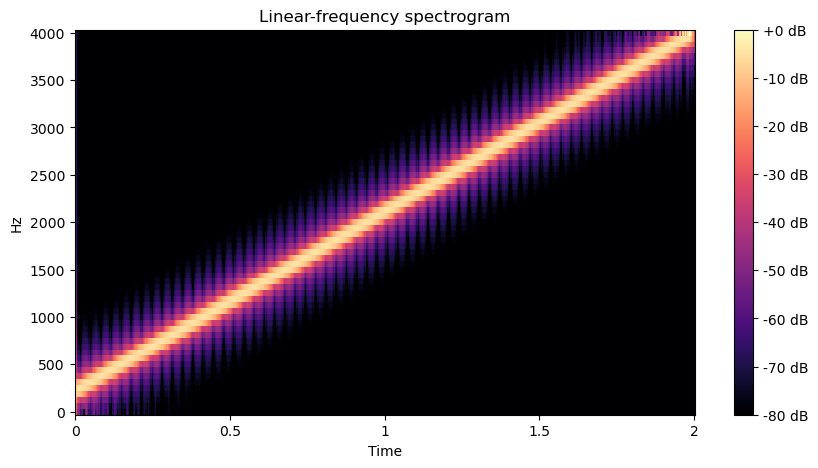

In [33]:
hop_length = 32
n_fft = 128

X2 = librosa.stft(x2, window='hann', n_fft=n_fft, hop_length=hop_length)
D2 = librosa.amplitude_to_db(np.abs(X2), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Geneate a sine sweep with aliasing 

In [34]:
fs = 8000
dur = 2
freq = np.linspace(220,16000,dur*fs);


phase = 0;
x3 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x3[i] = np.sin(phase)

    
ipd.Audio(x3, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

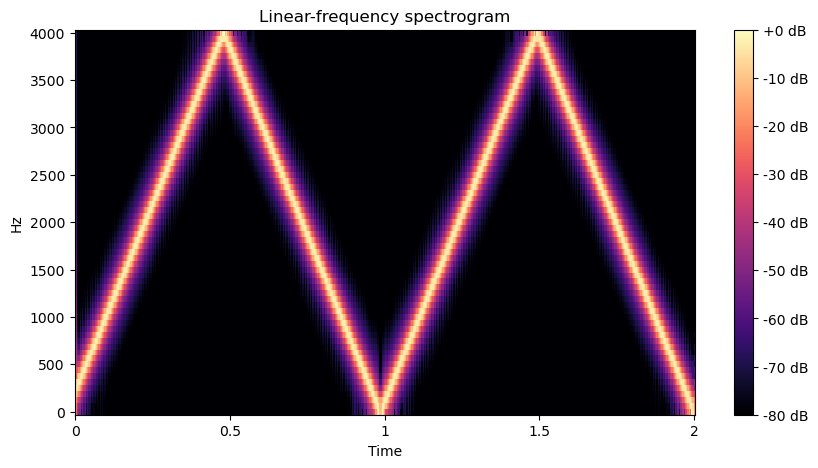

In [9]:
hop_length = 32
n_fft = 128

X3 = librosa.stft(x3, window='hann', n_fft=n_fft, hop_length=hop_length)
D3 = librosa.amplitude_to_db(np.abs(X3), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D3, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Geneate a harmonic sine sweep with aliasing 

In [35]:
fs = 8000
dur = 2
freq = np.linspace(220,16000,dur*fs);


phase = 0;
x4 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x4[i] = np.sin(phase)+ np.sin(2*phase)+ np.sin(3*phase)

    
ipd.Audio(x4, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

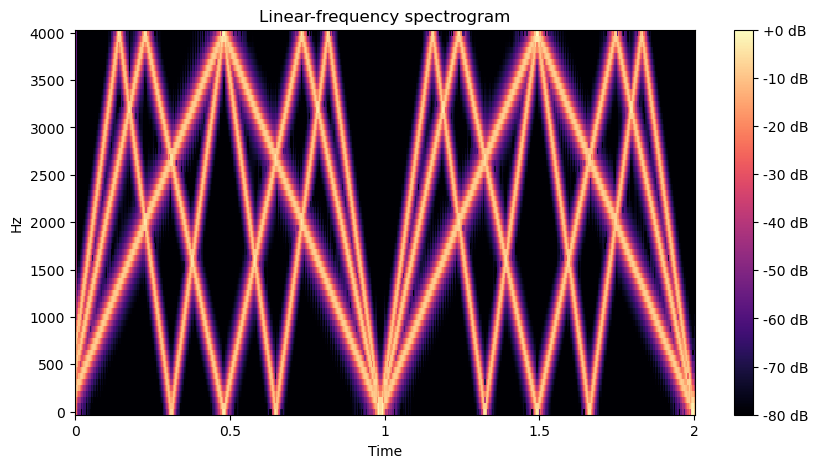

In [11]:
hop_length = 32
n_fft = 128

X4 = librosa.stft(x4, window='hann', n_fft=n_fft, hop_length=hop_length)
D4 = librosa.amplitude_to_db(np.abs(X4), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D4, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Geneate a sine with a random frequency 

In [41]:
fs = 8000
dur = 2
freq = np.arange(440,2000,10)
freq_change_rate = 0.1*fs

phase = 0;
x5 = np.zeros(dur*fs)

for i in range(dur*fs):
    if np.remainder(i,freq_change_rate) == 0:
        r = np.random.rand(1)
        f = freq[int(r*len(freq))]
        
    phase = phase + 2*np.pi*f/fs;
    x5[i] = np.sin(phase)
    
ipd.Audio(x5, rate=fs)


/var/folders/8t/nc77mkt10p7g1hgpv13rp7t40000gn/T/ipykernel_67773/1033067275.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = freq[int(r*len(freq))]


Text(0.5, 1.0, 'Linear-frequency spectrogram')

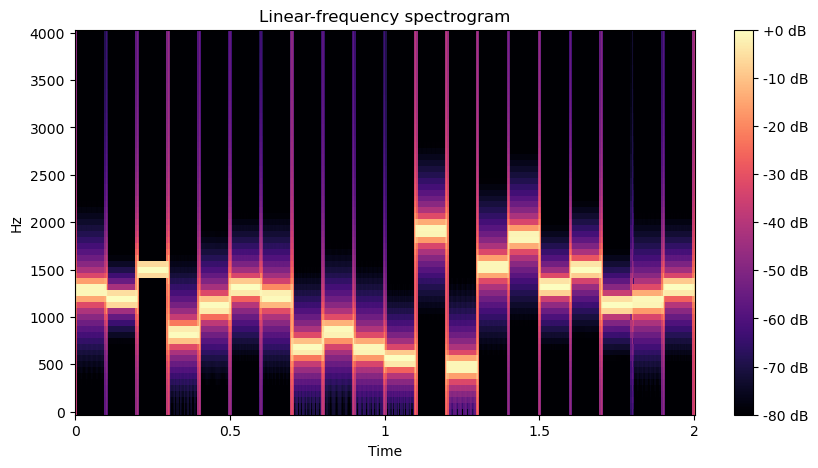

In [42]:
hop_length = 32
n_fft = 128

X5 = librosa.stft(x5, window='hann', n_fft=n_fft, hop_length=hop_length)
D5 = librosa.amplitude_to_db(np.abs(X5), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D5, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




R2D2? 

# Geneate a sine with clipping

In [43]:
fs = 8000
dur = 2
freq = 220

phase = 0;
x6 = np.zeros(dur*fs)

clip_max = 0.5

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq/fs;
    x6[i] = np.sin(phase)
    
    if x6[i] > clip_max:
        x6[i] = clip_max
    elif x6[i] < -clip_max:    
        x6[i] = -clip_max
    
ipd.Audio(x6, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

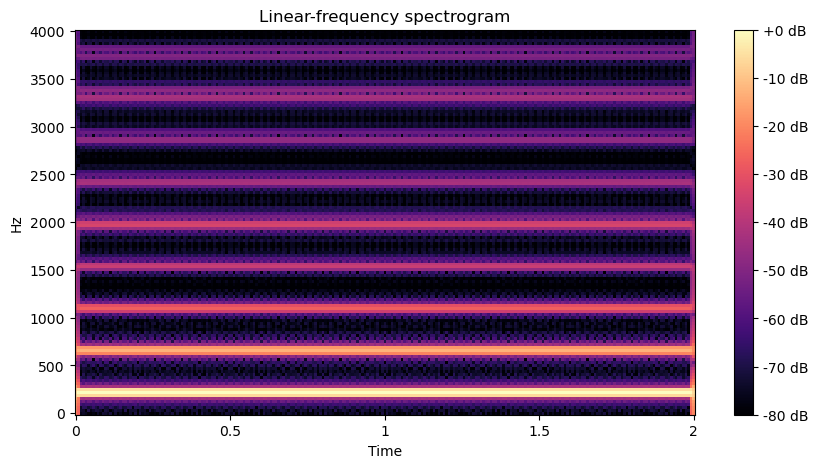

In [44]:
hop_length = 64
n_fft = 256

X6 = librosa.stft(x6, window='hann', n_fft=n_fft, hop_length=hop_length)
D6 = librosa.amplitude_to_db(np.abs(X6), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D6, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




This is a digital artifact but also a method of non-linear sound synthesis :)

# Generate a sine sweep with clipping 

In [45]:
fs = 8000
dur = 2
freq = np.linspace(220,4000,dur*fs);

clip_max = 0.5

phase = 0;
x7 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq[i]/fs;
    x7[i] = np.sin(phase)

    if x7[i] > clip_max:
        x7[i] = clip_max
    elif x7[i] < -clip_max:    
        x7[i] = -clip_max

ipd.Audio(x7, rate=fs)
    

Text(0.5, 1.0, 'Linear-frequency spectrogram')

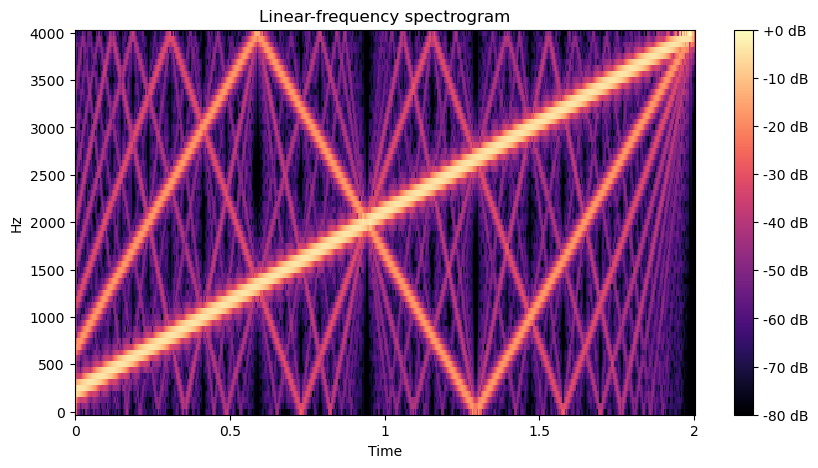

In [17]:
hop_length = 32
n_fft = 128

X7 = librosa.stft(x7, window='hann', n_fft=n_fft, hop_length=hop_length)
D7 = librosa.amplitude_to_db(np.abs(X7), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D7, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Generate a sine sweep with random frequency and clipping 

In [50]:
fs = 8000
dur = 2
freq = np.arange(440,2000,10)
freq_change_rate = 0.1*fs

phase = 0;
x8 = np.zeros(dur*fs)

for i in range(dur*fs):
    if np.remainder(i,freq_change_rate) == 0:
        r = np.random.rand(1)
        f = freq[int(r*len(freq))]
        
    phase = phase + 2*np.pi*f/fs;
    x8[i] = np.sin(phase)

    if x8[i] > clip_max:
        x8[i] = clip_max
    elif x8[i] < -clip_max:    
        x8[i] = -clip_max    
    
ipd.Audio(x8, rate=fs)


/var/folders/8t/nc77mkt10p7g1hgpv13rp7t40000gn/T/ipykernel_67773/4084237012.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f = freq[int(r*len(freq))]


Text(0.5, 1.0, 'Linear-frequency spectrogram')

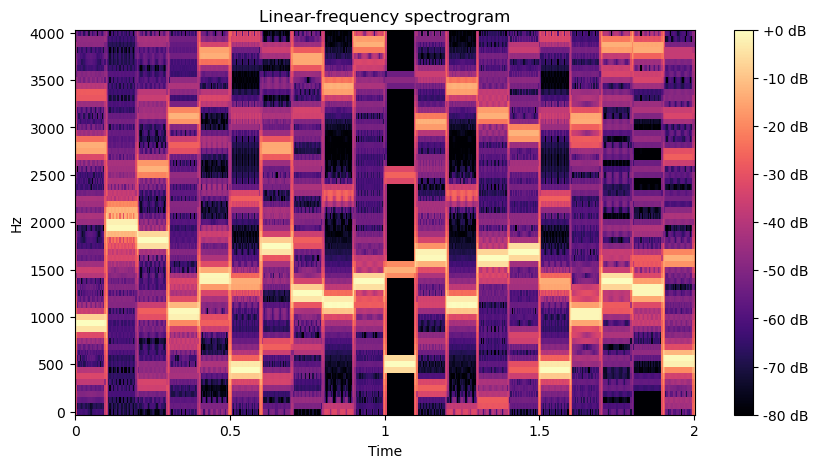

In [51]:
hop_length = 32
n_fft = 128

X8 = librosa.stft(x8, window='hann', n_fft=n_fft, hop_length=hop_length)
D8 = librosa.amplitude_to_db(np.abs(X8), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D8, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')




# Quantization


In [53]:

fs = 8000
dur = 2
freq = 440
B = 4 # number of bits

phase = 0;
x9 = np.zeros(dur*fs)

for i in range(dur*fs):
    phase = phase + 2*np.pi*freq/fs;
    x9[i] = np.sin(phase)
    
    # quantization
    x9[i] = np.power(2,B-1)*x9[i]
    x9[i] = np.round(x9[i])
    x9[i] = x9[i]/np.power(2,B-1)   
    
    
ipd.Audio(x9, rate=fs)


Text(0.5, 1.0, 'Linear-frequency spectrogram')

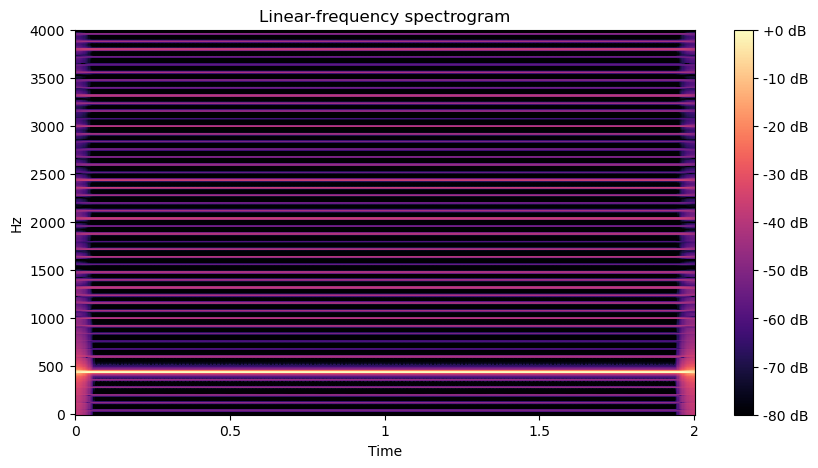

In [54]:
hop_length = 32
n_fft = 1024

X9 = librosa.stft(x9, window='hann', n_fft=n_fft, hop_length=hop_length)
D9 = librosa.amplitude_to_db(np.abs(X9), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D9, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')


